In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = np.ones((7, 7), np.uint8)

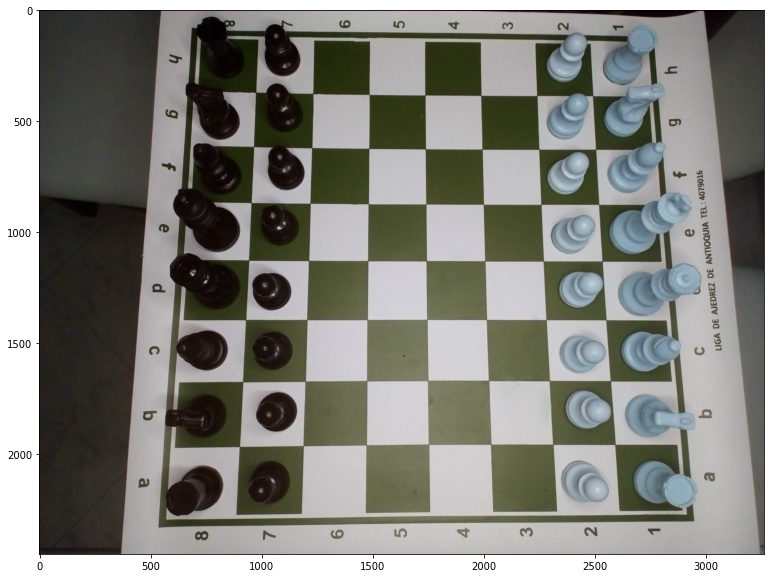

In [2]:
im1=cv2.imread("./photos/d10.jpg")
plt.figure(figsize = (16,10))
plt.imshow(im1)

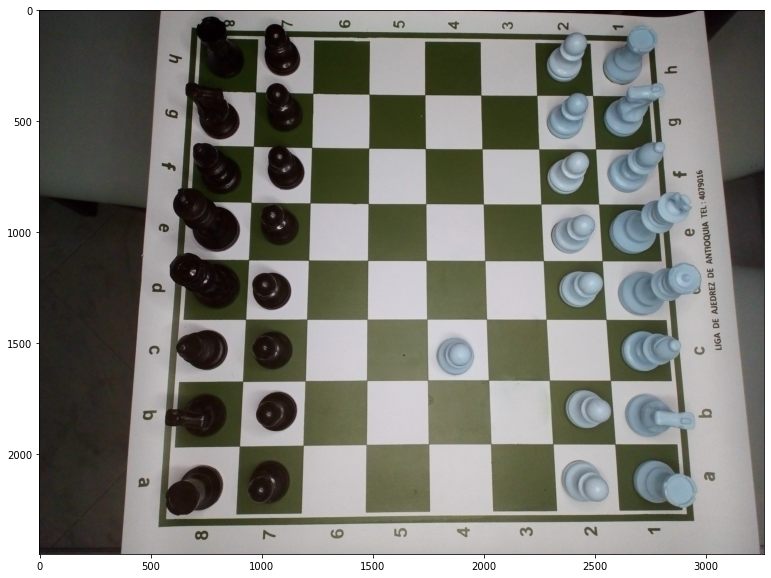

In [3]:
im2=cv2.imread("./photos/d11.jpg")
plt.figure(figsize = (16,10))
plt.imshow(im2)

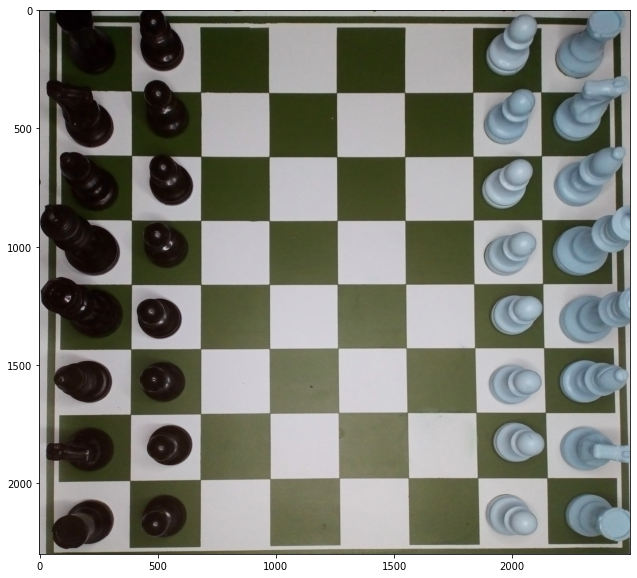

In [4]:
w = 2500
h = 2300
coordinates = np.float32([[650,70],[2800,90],[510,2300],[2950,2300]])
final = np.float32([[0,0],[w,0],[0,h],[w,h]])

M = cv2.getPerspectiveTransform(coordinates,final)
im1 = cv2.warpPerspective(im1,M,(w,h))
im2 = cv2.warpPerspective(im2,M,(w,h))

plt.figure(figsize = (16,10))
plt.imshow(im1)

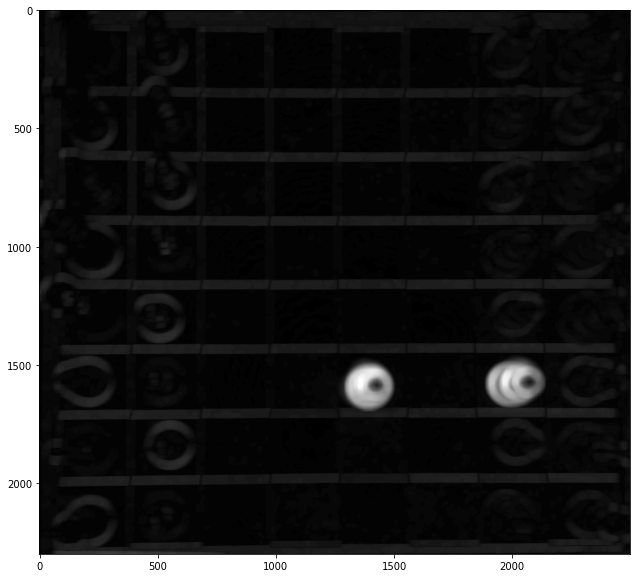

In [5]:
prev_frame=cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
frame=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
prev_blur = cv2.blur(prev_frame, (29, 29), 1)
blur = cv2.blur(frame, (29, 29), 1)

diff = cv2.absdiff(prev_blur, blur)
diff = cv2.dilate(diff, kernel, iterations = 2)
plt.figure(figsize = (16,10))
plt.imshow(diff, cmap = 'gray')

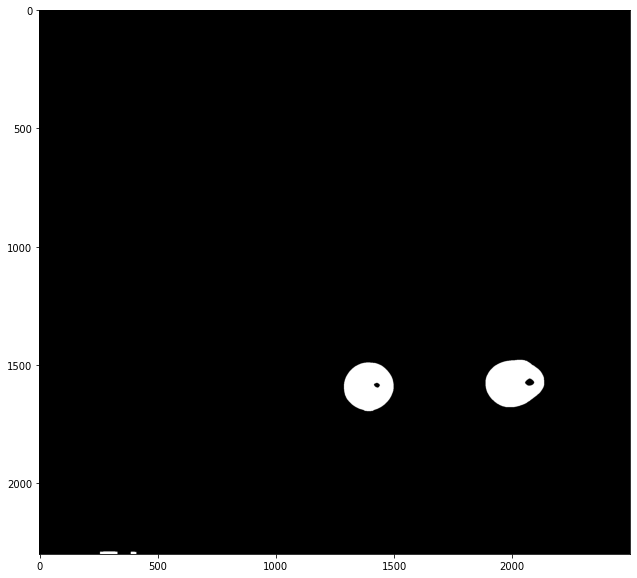

In [6]:
_, thresh = cv2.threshold(diff, 15, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (16,10))
plt.imshow(thresh, cmap='gray')

In [7]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

"""
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour) # Obtiene las coordenadas del contorno

    #Discrimina el dibujo de rectangulos cuando el movimiento es muy pequeño
    if cv2.contourArea(contour) < 10:
        continue
    cv2.rectangle(im2, (x, y), (x+w, y+h), (255, 0, 0), 2) # Dibuja el rectangulo
    
plt.imshow(im2)
"""

len(contours)

4

In [8]:
list_contours = list(contours)

In [9]:
cnt1 = max(list_contours, key=lambda x: cv2.contourArea(x))
list_contours.remove(cnt1)

cnt2 = max(list_contours, key=lambda x: cv2.contourArea(x))

/tmp/ipykernel_18985/4243989664.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  list_contours.remove(cnt1)


In [10]:
M1 = cv2.moments(cnt1)
M2 = cv2.moments(cnt2)

x1 = int(M1["m10"]/M1["m00"])
y1 = int(M1["m01"]/M1["m00"])
c1 = (x1, y1)


x2 = int(M2["m10"]/M2["m00"])
y2 = int(M2["m01"]/M2["m00"])
c2 = (x2, y2)

print (f'c1: {c1} \t c2: {c2}')

c1: (2009, 1576) 	 c2: (1394, 1591)


In [11]:
M1 = cv2.moments(cnt1)
M2 = cv2.moments(cnt2)

x1 = int(M1["m10"]/M1["m00"])
y1 = int(M1["m01"]/M1["m00"])
c1 = (x1, y1)


x2 = int(M2["m10"]/M2["m00"])
y2 = int(M2["m01"]/M2["m00"])
c2 = (x2, y2)

print (f'c1: {c1} \t c2: {c2}')

c1: (2009, 1576) 	 c2: (1394, 1591)


In [12]:
import math

def rect_size(w, h):
	wc = w / 8
	hc = h / 8
	return wc, hc

def get_square(wc, hc, x, y):
    hc = y / hc
    wc = x / wc
    
    hc = math.ceil(hc)
    numbers = {1:'h', 2:'g', 3:'f', 4:'e', 5:'d', 6:'c', 7:'b', 8:'a'}
    height = numbers.get(hc, 'Not found')

    wc = math.ceil(wc)
    letters = {1:'8', 2:'7', 3:'6', 4:'5', 5:'4', 6:'3', 7:'2', 8:'1'}
    width = letters.get(wc, 'Not found')

    coordinate = height + width

    return coordinate

def initial_position():
	pos = {'K':['e1','e1'],'k':['e8','e8'],'Q':['d1','d1'],'q':['d8','d8'],'RL':['a1','a1'],'RR':['h1','h1'],'rl':['a8','a8'],'rr':['h8','h8'],'NL':['b1','b1'],'NR':['g1','g1'],'nl':['b8','b8'],'nr':['g8','g8'],'BL':['c1','c1'],'BR':['f1','f1'],'bl':['c8','c8'],'br':['f8','f8'],'P1':['a2','a2'],'P2':['b2','b2'],'P3':['c2','c2'],'P4':['d2','d2'],'P5':['e2','e2'],'P6':['f2','f2'],'P7':['g2','g2'],'P8':['h2','h2'],'p1':['a7','a7'],'p2':['b7','b7'],'p3':['c7','c7'],'p4':['d7','d7'],'p5':['e7','e7'], 'p6':['f7','f7'],'p7':['g7','g7'],'p8':['h7','h7']}
	return pos


In [13]:
p = initial_position()

In [14]:
x1, y1 = c1[0], c1[1]
wc, hc = rect_size(w, h)
coord1 = get_square(wc, hc, x1, y1)

In [15]:
x2, y2 = c2[0], c2[1]
wc, hc = rect_size(w, h)
coord2 = get_square(wc, hc, x2, y2)

In [16]:
print(f'coord1: {coord1}, coord2: {coord2}')

coord1: c2, coord2: c4


In [17]:
def get_piece_move(pos, coord1, coord2):
    piece = ''
    following = ''
    actual = ''
    for key, value in pos.items():
        if coord1 == value[1]:
            piece = key
            actual = coord1
            following = coord2
            break
        if coord2 == value[1]:
            piece = key
            actual = coord2
            following = coord1
            break
    
    move = actual + piece + following
    pos[piece] = [actual, following]
    return pos, piece, move
    

In [18]:
pnew, piece, move = get_piece_move(p, coord1, coord2)
print(f'piece: {piece}, move: {move}')

piece: P3, move: c2P3c4


In [19]:
pnew

{'K': ['e1', 'e1'],
 'k': ['e8', 'e8'],
 'Q': ['d1', 'd1'],
 'q': ['d8', 'd8'],
 'RL': ['a1', 'a1'],
 'RR': ['h1', 'h1'],
 'rl': ['a8', 'a8'],
 'rr': ['h8', 'h8'],
 'NL': ['b1', 'b1'],
 'NR': ['g1', 'g1'],
 'nl': ['b8', 'b8'],
 'nr': ['g8', 'g8'],
 'BL': ['c1', 'c1'],
 'BR': ['f1', 'f1'],
 'bl': ['c8', 'c8'],
 'br': ['f8', 'f8'],
 'P1': ['a2', 'a2'],
 'P2': ['b2', 'b2'],
 'P3': ['c2', 'c4'],
 'P4': ['d2', 'd2'],
 'P5': ['e2', 'e2'],
 'P6': ['f2', 'f2'],
 'P7': ['g2', 'g2'],
 'P8': ['h2', 'h2'],
 'p1': ['a7', 'a7'],
 'p2': ['b7', 'b7'],
 'p3': ['c7', 'c7'],
 'p4': ['d7', 'd7'],
 'p5': ['e7', 'e7'],
 'p6': ['f7', 'f7'],
 'p7': ['g7', 'g7'],
 'p8': ['h7', 'h7']}